**Trends**, dalam Time Series Analysis terdapat tiga jenis trends yaitu naik ketika memiliki kemiringan positif, turun ketika memiliki kemiringan negatif, dan horizontal / stasioner. Time series dapat memiliki ketiga jenis trends sekaligus, salah satu, atau bahkan stasioner.  
**Seasonality** merupakan trends yang berulang, dimana kita mengetahui siklus pengulangannya, artinya kita mengetahui berapa periode trends akan berulang.  
**Cyclical** merupakan trends tanpa set pengulangan, artinya terjadi pengulangan trends namun tidak dapat ditentukan periode pengulangannya.  

Filter Hodrick-Prescott membagi Time series menjadi dua komponen yaitu komponen trend dan komponen cyclical.

---

**Trends**, in Time Series Analysis there are three types of trends, namely up when it has a positive slope, down when it has a negative slope, and horizontal / stationary. Time series can have all three types of trends at once, one, or even stationary.
**Seasonality** are repeating trends, where we know the repetition cycle, meaning that we know how many periods of trends will repeat.
**Cyclical** are trends without a set of repetitions, meaning that there is a repetition of trends but the repetition period cannot be determined.

The Hodrick-Prescott filter divides the Time series into two components, namely a trend component and a cyclical component.

### Introduction to statsmodel library

In [11]:
# import package
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter

In [3]:
# load dataset from statsmodel
# df = pd.read_csv("/UDEMY_TSA_FINAL/Data/macrodata.csv", index_col=0, parse_dates=True)

df = sm.datasets.macrodata.load_pandas().data
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


[Text(0, 0.5, 'Billions of Chained 2005 US$'),
 Text(0.5, 1.0, 'Real Gross Domestic Product 1959-2009')]

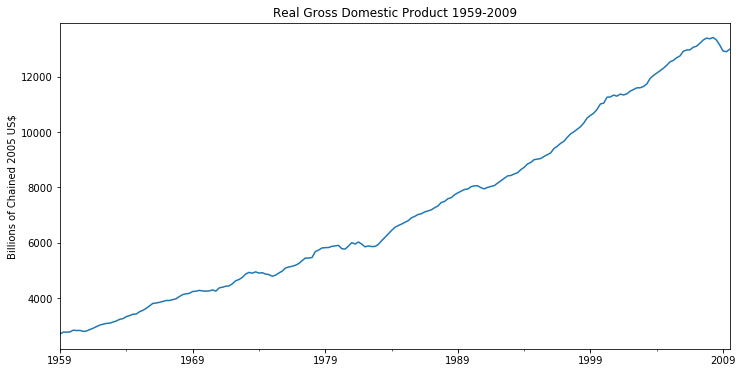

In [10]:
# plot realgdp
ax = df['realgdp'].plot(figsize=(12, 6))
ax.autoscale(axis='x', tight=True)
ax.set(ylabel="Billions of Chained 2005 US$", title="Real Gross Domestic Product 1959-2009")

In [13]:
# get tsa components (trends and cyclical)
# tuple unpack
gdp_cyclical, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

**About lambda from course notes:**  
The  𝜆  value above handles variations in the growth rate of the trend component.
When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.

In [14]:
print(f"type of gdp_cyclical variable is {type(gdp_cyclical)}")
print(f"type of gdp_trend variable is {type(gdp_trend)}")

type of gdp_cyclical variable is <class 'pandas.core.series.Series'>
type of gdp_trend variable is <class 'pandas.core.series.Series'>


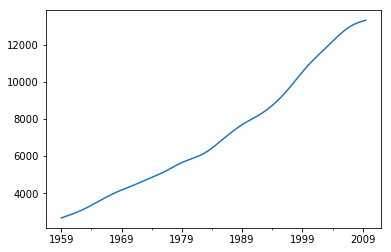

In [15]:
gdp_trend.plot()

In [16]:
df['gdptrend'] = gdp_trend

In [17]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdptrend
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


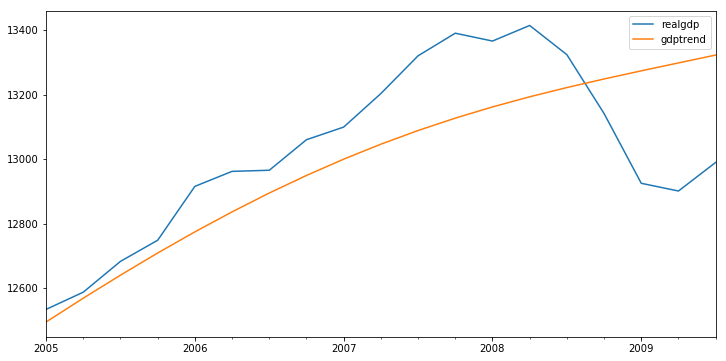

In [19]:
ax = df[['realgdp', 'gdptrend']]['2005':].plot(figsize=(12, 6))
ax.autoscale(axis='x', tight=True)

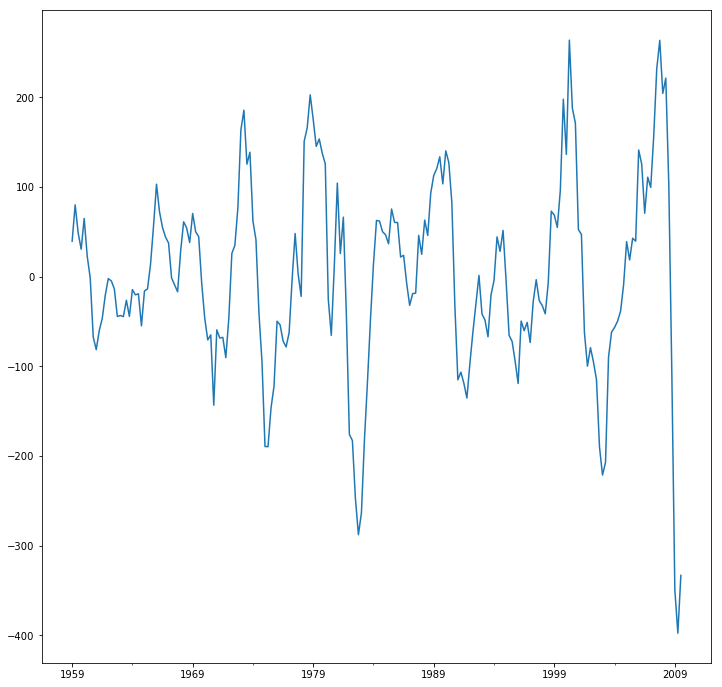

In [41]:
gdp_cyclical.plot()

### ETS Decomposition

About [time series decomposition](https://en.wikipedia.org/wiki/Decomposition_of_time_series)

In [21]:
airline = pd.read_csv("UDEMY_TSA_FINAL/Data/airline_passengers.csv", index_col='Month', parse_dates=True)

In [40]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [23]:
airline.isnull().sum()

Thousands of Passengers    0
dtype: int64

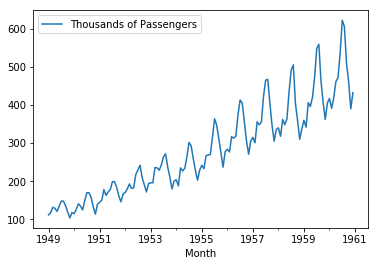

In [24]:
airline.plot()

**About model for decomposition from course notes:**  
We apply an **additive** model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).  
A **multiplicative** model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

the trend looks incereasing at a slightly higher rate than just linear, so it will use multiplicative model.

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

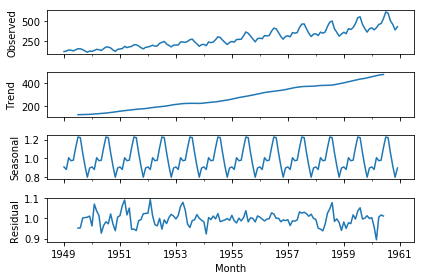

In [30]:
result.plot();

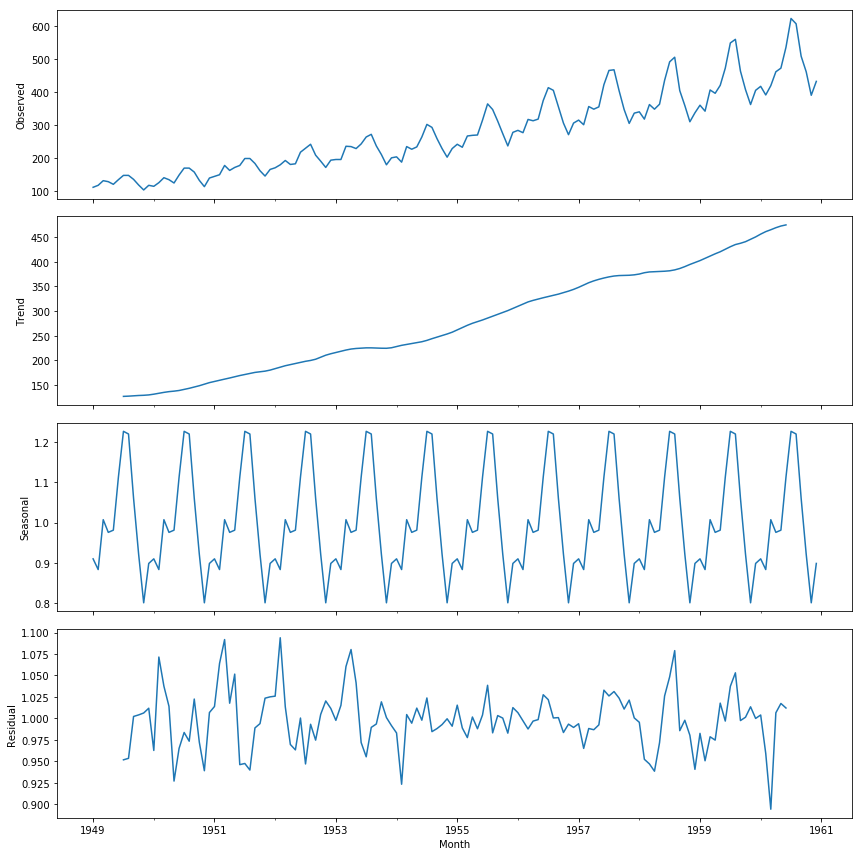

In [39]:
# to resize result.plot()
from pylab import rcParams
rcParams["figure.figsize"] = 12,12

result.plot();

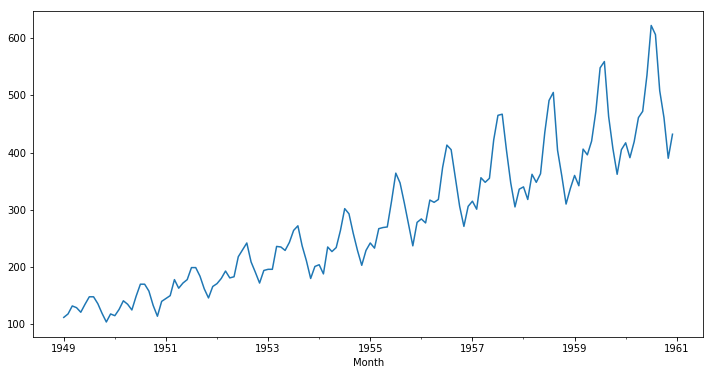

In [34]:
# individual
result.observed.plot(figsize=(12,6))

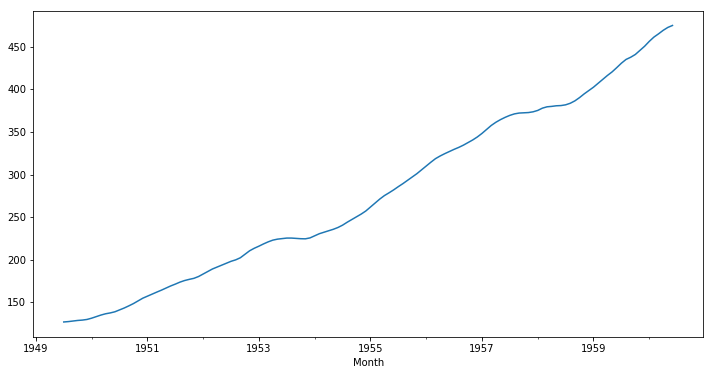

In [35]:
result.trend.plot(figsize=(12,6))

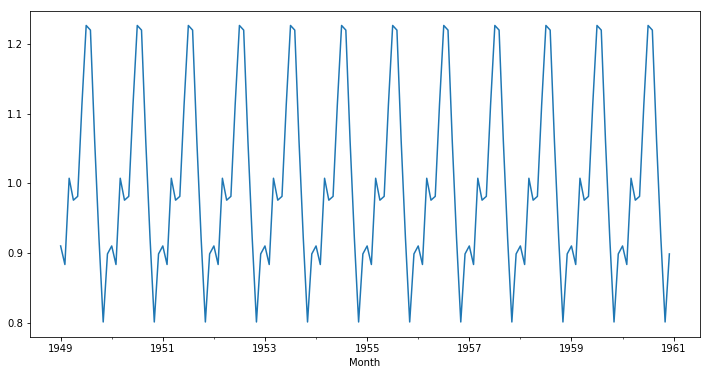

In [36]:
result.seasonal.plot(figsize=(12,6))

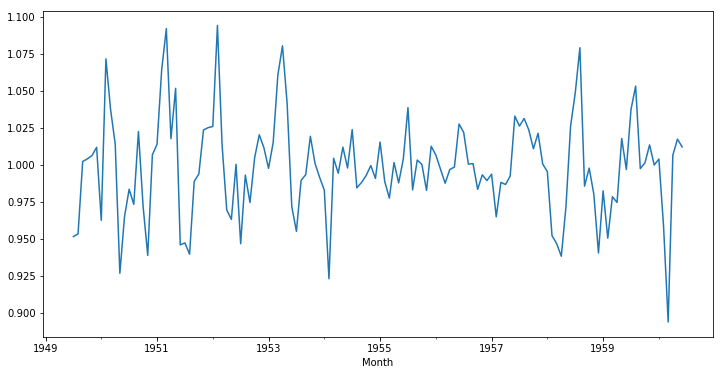

In [37]:
result.resid.plot(figsize=(12,6))